### Data Cleaning & EDA

This notebook loads the raw housing maintenance dataset, performs cleaning, 
corrects data types, handles missing values, and performs exploratory data analysis 
to understand early signs of maintenance severity.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Housing_Maintenance.csv")
df.head()

,timestamp,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,device_status,maintenance_issue_type,maintenance_frequency,maintenance_resolution_time,resident_feedback_score,complaint_count,predicted_energy_usage,predicted_maintenance_need,predicted_resident_satisfaction,recommended_action
0,30-05-2024 07:03,B2,R3,25.0,62.2,48.0,63.0,2,On,NaN,5,17.3,4.0,3,45.399282,5.881158,4.474837,Adjust Temperature
1,18-07-2024 14:04,B3,R8,22.5,44.2,47.0,161.6,3,On,NaN,3,15.1,1.5,1,47.484473,3.484496,1.730652,Adjust Temperature
2,30-03-2024 15:55,B3,R9,27.8,33.9,13.8,330.2,4,On,HVAC,1,17.6,4.4,1,14.683456,0.838978,4.205837,Increase Maintenance
3,12-04-2024 17:25,B1,R8,22.4,39.8,38.5,274.1,5,Malfunction,NaN,4,14.6,2.5,2,39.502390,4.378002,2.709528,Monitor Device
4,03-03-2024 22:00,B1,R2,19.6,38.3,25.0,99.9,2,On,Electrical,1,4.2,4.3,3,22.807192,0.897037,4.851142,Increase Maintenance


In [2]:

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M", errors='coerce')

# Cleaning categorical fields
df['device_status'] = df['device_status'].astype(str).str.strip().str.title()
df['maintenance_issue_type'] = df['maintenance_issue_type'].astype(str).str.strip().str.title()

# Converting "None" → actual None (missing)
df['maintenance_issue_type'] = df['maintenance_issue_type'].replace({"None": None})

# Formatting feature names
df['recommended_action'] = df['recommended_action'].astype(str).str.replace("_", " ").str.title()

df.head()

,timestamp,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,device_status,maintenance_issue_type,maintenance_frequency,maintenance_resolution_time,resident_feedback_score,complaint_count,predicted_energy_usage,predicted_maintenance_need,predicted_resident_satisfaction,recommended_action
0,2024-05-30 07:03:00,B2,R3,25.0,62.2,48.0,63.0,2,On,Nan,5,17.3,4.0,3,45.399282,5.881158,4.474837,Adjust Temperature
1,2024-07-18 14:04:00,B3,R8,22.5,44.2,47.0,161.6,3,On,Nan,3,15.1,1.5,1,47.484473,3.484496,1.730652,Adjust Temperature
2,2024-03-30 15:55:00,B3,R9,27.8,33.9,13.8,330.2,4,On,Hvac,1,17.6,4.4,1,14.683456,0.838978,4.205837,Increase Maintenance
3,2024-04-12 17:25:00,B1,R8,22.4,39.8,38.5,274.1,5,Malfunction,Nan,4,14.6,2.5,2,39.502390,4.378002,2.709528,Monitor Device
4,2024-03-03 22:00:00,B1,R2,19.6,38.3,25.0,99.9,2,On,Electrical,1,4.2,4.3,3,22.807192,0.897037,4.851142,Increase Maintenance


In [3]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        1000 non-null   datetime64[ns]
 1   building_id                      1000 non-null   object        
 2   room_id                          1000 non-null   object        
 3   temperature_c                    1000 non-null   float64       
 4   humidity_percent                 1000 non-null   float64       
 5   energy_usage_kwh                 1000 non-null   float64       
 6   water_usage_liters               1000 non-null   float64       
 7   occupancy_count                  1000 non-null   int64         
 8   device_status                    1000 non-null   object        
 9   maintenance_issue_type           1000 non-null   object        
 10  maintenance_frequency            1000 non-null   int64       

timestamp                          0
building_id                        0
room_id                            0
temperature_c                      0
humidity_percent                   0
energy_usage_kwh                   0
water_usage_liters                 0
occupancy_count                    0
device_status                      0
maintenance_issue_type             0
maintenance_frequency              0
maintenance_resolution_time        0
resident_feedback_score            0
complaint_count                    0
predicted_energy_usage             0
predicted_maintenance_need         0
predicted_resident_satisfaction    0
recommended_action                 0
dtype: int64

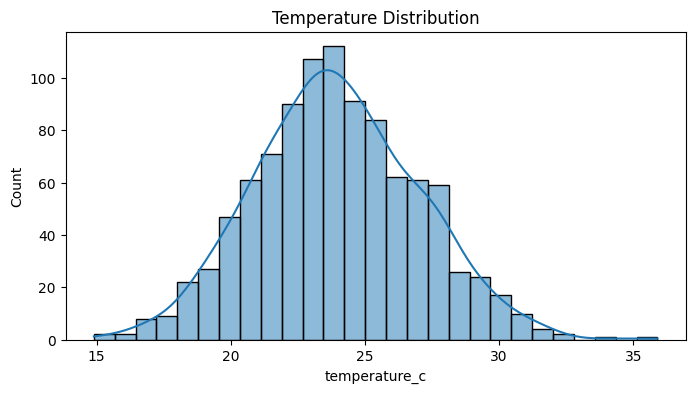

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df['temperature_c'], kde=True)
plt.title("Temperature Distribution")
plt.show()




### **Insight:**

Most homes sit comfortably around 23–25°C, showing that indoor conditions are generally well-regulated. The few extreme highs and lows could hint at early HVAC or sensor issues.


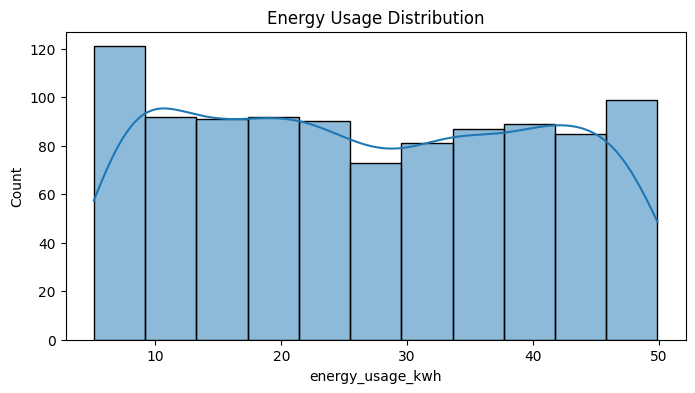

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['energy_usage_kwh'], kde=True)
plt.title("Energy Usage Distribution")
plt.show()


### **Insight:**

Energy usage is spread fairly evenly across the range, suggesting diverse appliance loads and occupancy patterns. The slight dips and rises hint at varying resident behavior rather than any systemic issue.

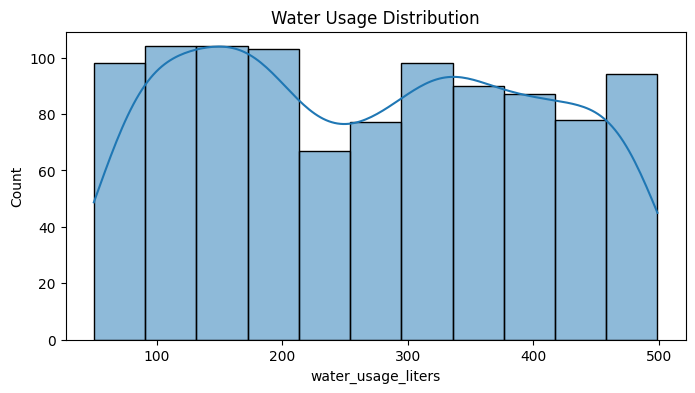

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['water_usage_liters'], kde=True)
plt.title("Water Usage Distribution")
plt.show()



### **Insight:**

Water usage varies widely across units, reflecting different household sizes and habits. The even spread suggests no major leaks or abnormal spikes at the building level.

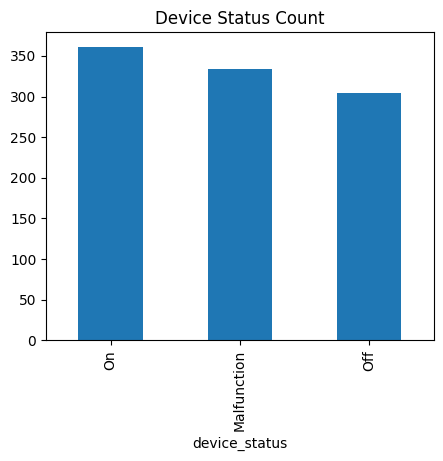

In [7]:
df['device_status'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("Device Status Count")
plt.show()




### **Insight:**

Most devices are running fine, but the number of malfunctions is surprisingly close to the “Off” count. It hints that breakdowns aren’t rare and could be a steady source of maintenance calls.


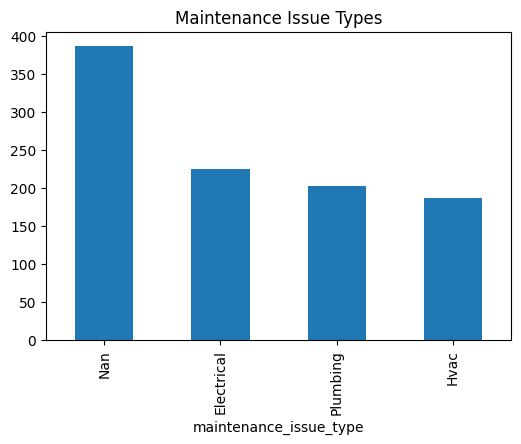

In [8]:
df['maintenance_issue_type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Maintenance Issue Types")
plt.show()


### **Insight:**

Of the logged issues, electrical faults top the list, followed by plumbing and HVAC concerns.

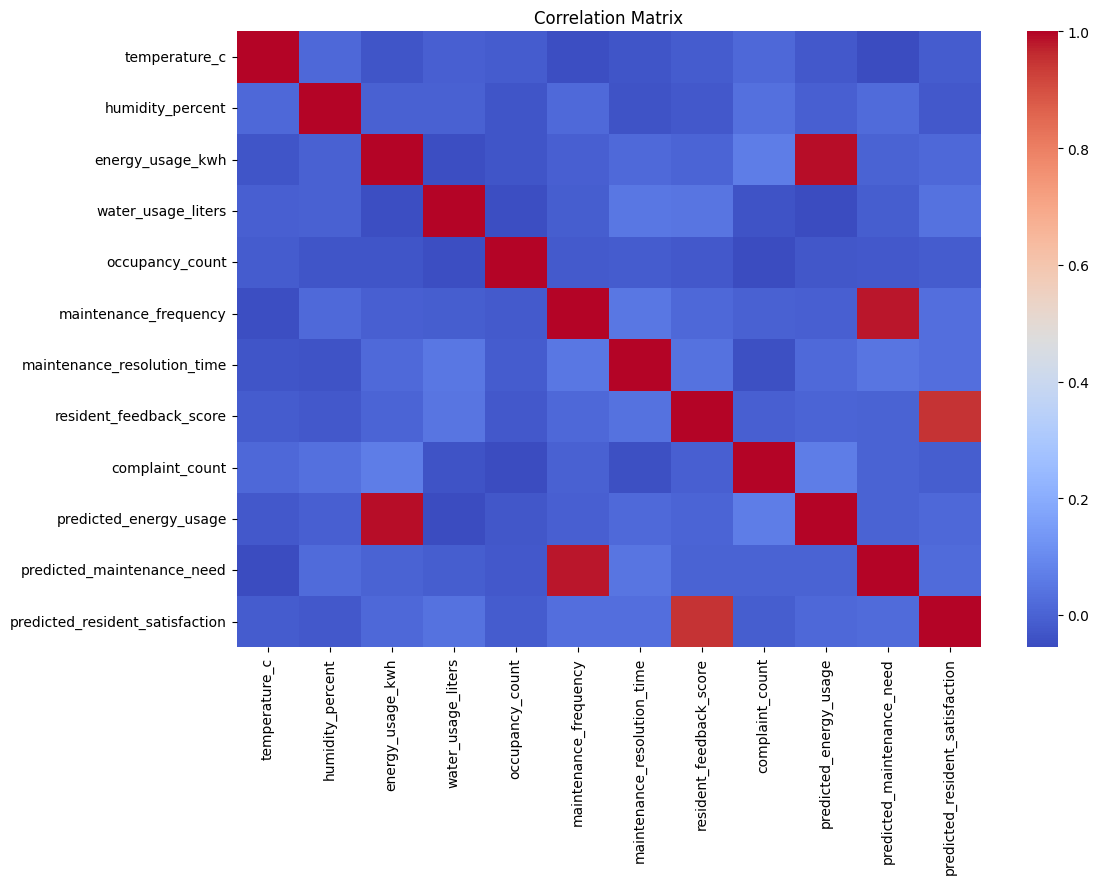

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


### **Insight:**

Most features are weakly correlated, meaning each contributes independent information. The only noticeable relationships are among the model-generated predictions and a small link between complaints and lower feedback scores.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# 1. Selecting numeric features only
numeric_df = df.select_dtypes(include=['int64','float64']).copy()

# Dropping predicted columns for clean baseline test
numeric_df = numeric_df.drop([
    'predicted_energy_usage',
    'predicted_maintenance_need',
    'predicted_resident_satisfaction'
], axis=1, errors='ignore')


# 2. Calculating VIF for each numeric column
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) 
                   for i in range(len(numeric_df.columns))]

vif_data


,feature,VIF
0,temperature_c,26.209941
1,humidity_percent,16.592187
2,energy_usage_kwh,4.785154
3,water_usage_liters,4.996017
4,occupancy_count,3.067252
5,maintenance_frequency,3.100865
6,maintenance_resolution_time,4.586865
7,resident_feedback_score,7.412657
8,complaint_count,2.920915


### 🛠️ Feature Engineering: Operational & Risk Flags

In this step, I have created several binary flags that capture operational issues, unusual behavior, and resident dissatisfaction. These engineered features would help the model detect hidden risk patterns that raw data alone cannot reveal:

- **`malfunction_flag`** – identifies devices explicitly marked as malfunctioning.  
- **`temp_out_of_range`** – flags temperatures outside the normal comfort band (18–28°C).  
- **`energy_spike_flag`** – marks energy usage above the 85th percentile as abnormal.  
- **`water_spike_flag`** – marks unusually high water consumption above the 85th percentile.  
- **`complaint_intensity`** – identifies units with 3 or more complaints.  
- **`low_feedback_flag`** – flags residents reporting low satisfaction (score ≤ 3).  
- **`issue_present_flag`** – identifies real maintenance issues like HVAC or electrical faults.

These indicators strengthen the model by highlighting early warning signs of potential maintenance needs.


In [11]:
# 1A. Device Malfunction Flag
df["malfunction_flag"] = df["device_status"].apply(lambda x: 1 if x == "Malfunction" else 0)

# 1B. Temperature Out-of-Range Flag
# (Assuming 18–28°C is normal comfort range)
df["temp_out_of_range"] = df["temperature_c"].apply(lambda x: 1 if (x < 18 or x > 28) else 0)

# 1C. Energy Spike Flag
# (>85th percentile = unusually high consumption)
energy_threshold = df["energy_usage_kwh"].quantile(0.85)
df["energy_spike_flag"] = df["energy_usage_kwh"].apply(lambda x: 1 if x > energy_threshold else 0)


# 1D. Water Spike Flag
# (>85th percentile)
water_threshold = df["water_usage_liters"].quantile(0.85)
df["water_spike_flag"] = df["water_usage_liters"].apply(lambda x: 1 if x > water_threshold else 0)

# 1E. Complaint Intensity
# 3+ complaints means higher severity
df["complaint_intensity"] = df["complaint_count"].apply(lambda x: 1 if x >= 3 else 0)

# 1F. Low Feedback (resident dissatisfaction)
# <= 3 = negative experience
df["low_feedback_flag"] = df["resident_feedback_score"].apply(lambda x: 1 if x <= 3 else 0)

# 1G. Issue Present Flag
# HVAC / Electrical = true issues
df["issue_present_flag"] = df["maintenance_issue_type"].apply(lambda x: 1 if x not in ["None", "Unknown"] else 0)

df.head()


,timestamp,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,device_status,maintenance_issue_type,...,predicted_maintenance_need,predicted_resident_satisfaction,recommended_action,malfunction_flag,temp_out_of_range,energy_spike_flag,water_spike_flag,complaint_intensity,low_feedback_flag,issue_present_flag
0,2024-05-30 07:03:00,B2,R3,25.0,62.2,48.0,63.0,2,On,Nan,...,5.881158,4.474837,Adjust Temperature,0,0,1,0,1,0,1
1,2024-07-18 14:04:00,B3,R8,22.5,44.2,47.0,161.6,3,On,Nan,...,3.484496,1.730652,Adjust Temperature,0,0,1,0,0,1,1
2,2024-03-30 15:55:00,B3,R9,27.8,33.9,13.8,330.2,4,On,Hvac,...,0.838978,4.205837,Increase Maintenance,0,0,0,0,0,0,1
3,2024-04-12 17:25:00,B1,R8,22.4,39.8,38.5,274.1,5,Malfunction,Nan,...,4.378002,2.709528,Monitor Device,1,0,0,0,0,1,1
4,2024-03-03 22:00:00,B1,R2,19.6,38.3,25.0,99.9,2,On,Electrical,...,0.897037,4.851142,Increase Maintenance,0,0,0,0,1,0,1


### Severity Score Construction

To quantify overall risk, a **composite severity score** that weights multiple operational signals was created.  
This score helps convert raw conditions into a single numeric indicator of maintenance urgency.

The weighting logic:

- **Malfunction (×3)** — strongest signal of immediate failure  
- **Temperature out of range (×2)** — comfort/safety concern  
- **Energy spike (×2)** — potential electrical or appliance fault  
- **Water spike (×2)** — potential leak or plumbing issue  
- **Issue present (×2)** — known problem type (HVAC, Electrical, Plumbing)  
- **Complaint intensity (×1)** — repeated resident complaints  
- **Low feedback (×1)** — dissatisfaction or ongoing unresolved issues  
- **Maintenance frequency (×0.5)** — recurring servicing needs  

This aggregated score becomes a key input for predicting maintenance priority.


In [12]:
df["severity_score"] = (
    3 * df["malfunction_flag"] +
    2 * df["temp_out_of_range"] +
    2 * df["energy_spike_flag"] +
    2 * df["water_spike_flag"] +
    2 * df["issue_present_flag"] +
    1 * df["complaint_intensity"] +
    1 * df["low_feedback_flag"] +
    0.5 * df["maintenance_frequency"])


In [13]:
df["severity_score"].describe()


count    1000.00000
mean        5.84100
std         2.13993
min         2.00000
25%         4.00000
50%         5.50000
75%         7.00000
max        14.00000
Name: severity_score, dtype: float64

In [14]:
def priority_level(score):
    if score < 3:
        return "Low"
    elif score < 6:
        return "Medium"
    elif score < 9:
        return "High"
    else:
        return "Emergency"

df["priority_level"] = df["severity_score"].apply(priority_level)


In [15]:
df["priority_level"].value_counts()


priority_level
Medium       462
High         399
Emergency     85
Low           54
Name: count, dtype: int64

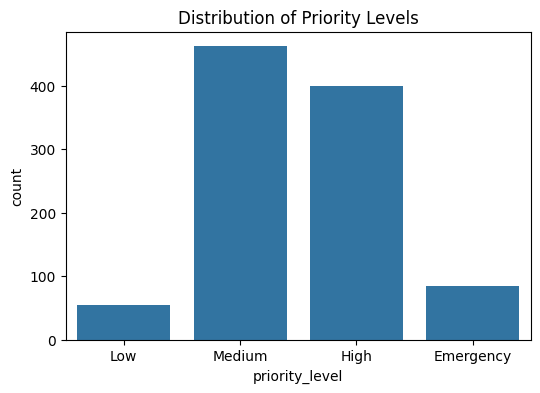

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="priority_level", order=["Low","Medium","High","Emergency"])
plt.title("Distribution of Priority Levels")
plt.show()


## Baseline Logistic Regression Model
This section trains and evaluates the baseline LR model using limited raw features.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------
# 1. Select baseline features
# --------------------------------------------

baseline_lr_features = [
    'temperature_c',
    'humidity_percent',
    'energy_usage_kwh',
    'water_usage_liters',
    'occupancy_count',
    'maintenance_frequency',
    'maintenance_resolution_time',
    'resident_feedback_score',
    'complaint_count',
    
    # Light engineered flags
    'malfunction_flag',
    'temp_out_of_range',
    'issue_present_flag',
    'complaint_intensity',
    'low_feedback_flag']


X_lr = df[baseline_lr_features].copy()
y = df['priority_level'].copy()

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lr, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
log_reg = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

c:\Users\sheth\anaconda3\envs\spacyenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [21]:
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

   Emergency       0.58      0.33      0.42        21
        High       0.74      0.82      0.78       100
         Low       0.73      0.57      0.64        14
      Medium       0.84      0.84      0.84       115

    accuracy                           0.78       250
   macro avg       0.72      0.64      0.67       250
weighted avg       0.77      0.78      0.77       250



<Figure size 600x500 with 0 Axes>

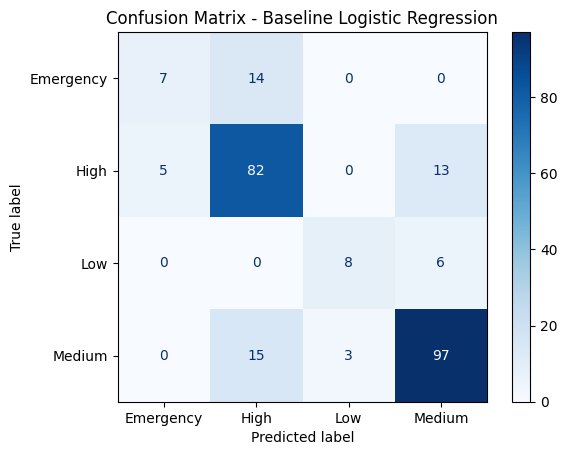

In [22]:
plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=le.classes_)
    
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

In [23]:
baseline_accuracy = log_reg.score(X_test_scaled, y_test)
baseline_accuracy

0.776

In [24]:
coeff_df = pd.DataFrame({
    'feature': baseline_lr_features,
    'coefficient': log_reg.coef_[0]}).sort_values(by='coefficient', ascending=False)

coeff_df


,feature,coefficient
9,malfunction_flag,3.714128
5,maintenance_frequency,2.329783
10,temp_out_of_range,1.579008
12,complaint_intensity,1.466653
13,low_feedback_flag,1.425320
3,water_usage_liters,1.246410
2,energy_usage_kwh,1.015608
0,temperature_c,0.043469
11,issue_present_flag,0.000000
4,occupancy_count,-0.063481


The baseline Logistic Regression model provides a simple, interpretable benchmark.
It helps identify which features have a positive or negative influence on priority level,
before applying more complex non-linear models like RandomForest or XGBoost.


## Random Forest Model
This section trains the stronger Random Forest using full engineered features.

In [25]:
strong_features = [
    'temperature_c',
    'humidity_percent',
    'energy_usage_kwh',
    'water_usage_liters',
    'occupancy_count',
    'maintenance_frequency',
    'maintenance_resolution_time',
    'resident_feedback_score',
    'complaint_count',
    'predicted_energy_usage',
    'predicted_maintenance_need',
    'predicted_resident_satisfaction',
    'malfunction_flag',
    'temp_out_of_range',
    'energy_spike_flag',
    'water_spike_flag',
    'issue_present_flag',
    'complaint_intensity',
    'low_feedback_flag',
    'severity_score']

X_rf = df[strong_features].copy()
y = df['priority_level'].copy()

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [26]:
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced")

rf.fit(X_train_rf, y_train_rf)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score



y_pred_rf = rf.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)


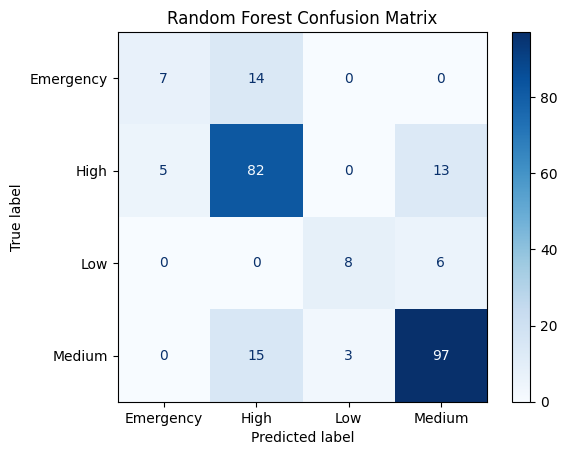

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [30]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_accuracy


0.976

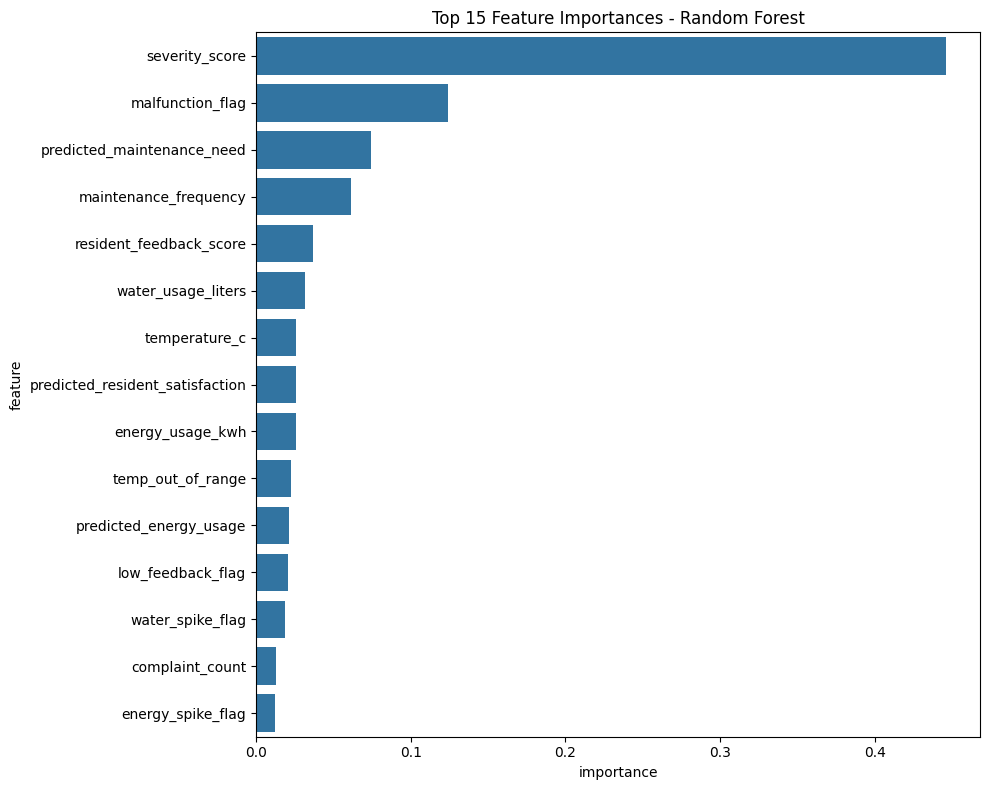

,feature,importance
19,severity_score,0.445860
12,malfunction_flag,0.123962
10,predicted_maintenance_need,0.074320
5,maintenance_frequency,0.061225
7,resident_feedback_score,0.036449
3,water_usage_liters,0.031503
0,temperature_c,0.026078
11,predicted_resident_satisfaction,0.025718
2,energy_usage_kwh,0.025564
13,temp_out_of_range,0.022604


In [31]:
import pandas as pd
import numpy as np

importance_df = pd.DataFrame({'feature': strong_features,'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

importance_df.head(20)


In [32]:
print("Baseline Logistic Regression Accuracy:", baseline_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Baseline Logistic Regression Accuracy: 0.776
Random Forest Accuracy: 0.976



# Model Results & Prediction Examples

In this section we:
- Compare baseline Logistic Regression vs Random Forest accuracy on the test set
- Show concrete test examples with true vs predicted priority
- Highlight some high-priority cases the Random Forest flags



---

# 🔎 Model Evaluation & Prediction Examples

In this section, I have evaluated both models and visualize how the Random Forest performs on real unseen test cases.

---

## **Accuracy Comparison**
We compare:

- **Baseline Logistic Regression** — uses limited raw features  
- **Random Forest Classifier** — uses full engineered feature set  

This shows the performance improvement gained through advanced modeling and feature engineering.


In [33]:

from sklearn.metrics import accuracy_score

# Baseline Logistic Regression accuracy
y_pred_lr = log_reg.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Random Forest accuracy
y_pred_rf = rf.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)

print(f"Baseline Logistic Regression Accuracy: {lr_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")


Baseline Logistic Regression Accuracy: 0.776
Random Forest Accuracy: 0.976



---

## **5.2 Sample Test Case Predictions**

Below we randomly select **10 unseen test samples** and inspect:

- Building & room  
- Environmental readings  
- Usage patterns  
- Severity score  
- **True priority**  
- **Random Forest predicted priority**

This helps demonstrate how the model behaves on real-world maintenance scenarios.


In [34]:

# Build labelled Series for true and predicted RF priorities
true_labels_rf = pd.Series(
    le.inverse_transform(y_test_rf),
    index=X_test_rf.index,
    name="true_priority")

pred_labels_rf = pd.Series(
    le.inverse_transform(y_pred_rf),
    index=X_test_rf.index,
    name="rf_pred_priority")

# Sample 10 random test rows to inspect
sample_idx = X_test_rf.sample(10, random_state=42).index

examples = df.loc[sample_idx, [
    "building_id",
    "room_id",
    "temperature_c",
    "humidity_percent",
    "energy_usage_kwh",
    "water_usage_liters",
    "occupancy_count",
    "maintenance_issue_type",
    "device_status",
    "maintenance_frequency",
    "maintenance_resolution_time",
    "resident_feedback_score",
    "complaint_count",
    "severity_score",
    "priority_level"]].copy()

examples["true_priority"] = true_labels_rf.loc[sample_idx].values
examples["rf_pred_priority"] = pred_labels_rf.loc[sample_idx].values

examples


,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,maintenance_issue_type,device_status,maintenance_frequency,maintenance_resolution_time,resident_feedback_score,complaint_count,severity_score,priority_level,true_priority,rf_pred_priority
337,B3,R1,21.4,51.1,31.6,228.5,3,Plumbing,Malfunction,4,13.3,3.8,0,7.0,High,High,High
958,B1,R3,28.0,44.8,42.0,195.6,5,Nan,Off,0,18.5,4.3,0,2.0,Low,Low,Low
255,B3,R6,26.3,63.4,47.4,454.6,0,Hvac,On,3,18.1,2.4,3,9.5,Emergency,Emergency,High
865,B3,R10,21.4,31.1,33.5,136.3,2,Electrical,Malfunction,3,1.7,1.4,1,7.5,High,High,High
305,B3,R4,24.0,51.4,22.3,420.4,1,Nan,On,4,16.1,4.5,0,4.0,Medium,Medium,Medium
924,B1,R2,22.8,62.4,11.7,74.2,3,Nan,Off,0,21.1,4.4,3,3.0,Medium,Medium,Medium
377,B3,R9,24.2,37.8,6.2,348.0,0,Nan,Off,3,10.1,4.1,2,3.5,Medium,Medium,Medium
407,B2,R3,25.4,51.0,33.8,209.7,1,Nan,Off,5,11.3,2.1,1,5.5,Medium,Medium,Medium
146,B1,R8,16.3,54.1,22.2,87.6,2,Nan,On,1,19.1,1.3,3,6.5,High,High,High
218,B3,R8,25.8,31.2,10.5,266.2,1,Plumbing,Off,1,3.1,3.4,3,3.5,Medium,Medium,Medium



---

## **High-Risk Cases Predicted by the Model**

Here we filter and display only the cases where the model predicted:

- **High**
- **Emergency**

These are the most critical cases relevant for triaging maintenance workflows.


In [35]:

# Filter to High / Emergency predictions for demonstration
high_mask = examples["rf_pred_priority"].isin(["High", "Emergency"])
high_risk_examples = examples[high_mask].sort_values(by="severity_score", ascending=False)

high_risk_examples


,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,maintenance_issue_type,device_status,maintenance_frequency,maintenance_resolution_time,resident_feedback_score,complaint_count,severity_score,priority_level,true_priority,rf_pred_priority
255,B3,R6,26.3,63.4,47.4,454.6,0,Hvac,On,3,18.1,2.4,3,9.5,Emergency,Emergency,High
865,B3,R10,21.4,31.1,33.5,136.3,2,Electrical,Malfunction,3,1.7,1.4,1,7.5,High,High,High
337,B3,R1,21.4,51.1,31.6,228.5,3,Plumbing,Malfunction,4,13.3,3.8,0,7.0,High,High,High
146,B1,R8,16.3,54.1,22.2,87.6,2,Nan,On,1,19.1,1.3,3,6.5,High,High,High



---

## **Misclassified Example Analysis**

Misclassifications help identify:

- Borderline cases  
- Ambiguity in feature signals  
- Opportunities for improving rules or labels  

This is important for model auditing and operational reliability.


In [36]:

# Show any misclassified examples in this sample (if any)
misclassified = examples[examples["rf_pred_priority"] != examples["true_priority"]]
misclassified


,building_id,room_id,temperature_c,humidity_percent,energy_usage_kwh,water_usage_liters,occupancy_count,maintenance_issue_type,device_status,maintenance_frequency,maintenance_resolution_time,resident_feedback_score,complaint_count,severity_score,priority_level,true_priority,rf_pred_priority
255,B3,R6,26.3,63.4,47.4,454.6,0,Hvac,On,3,18.1,2.4,3,9.5,Emergency,Emergency,High
